In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#### Generating training samples within the range of -20 to +20, normalize them to -1 to +1, and split into training, validation, and test sets with 5% allocated for test and validation.


Train: 270
Test: 15
Validation: 15


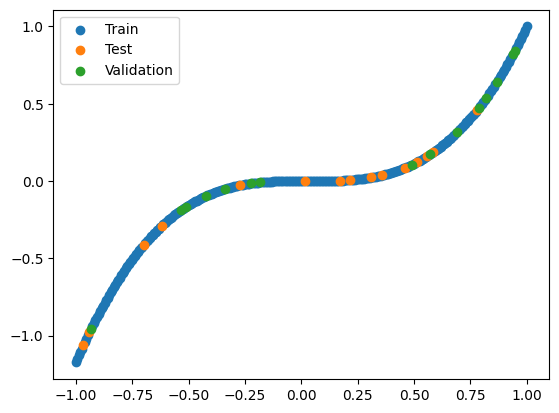

In [2]:

X = np.linspace(-20, 20, 300)
y = 5*X**3 - 8*X**2 - 7*X + 1

X = X/ np.max(X)
y = y/ np.max(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05)

print(f'Train: {len(x_train )}\nTest: {len(x_test)}\nValidation: {len(x_val)}')

plt.scatter(x_train, y_train, label='Train')
plt.scatter(x_test, y_test, label='Test')
plt.scatter(x_val, y_val, label='Validation')
plt.legend()
plt.show()

### Defining a DNN with three hidden layers (sizes: 32, 64, and 128) and display the architecture with the total number of parameters.


In [3]:
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=[1], activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.R2Score(name='accuracy')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training the model

In [4]:

history = model.fit(x_train, y_train, epochs=26, validation_data=(x_val, y_val), verbose=0)

## Plotting training and validation loss

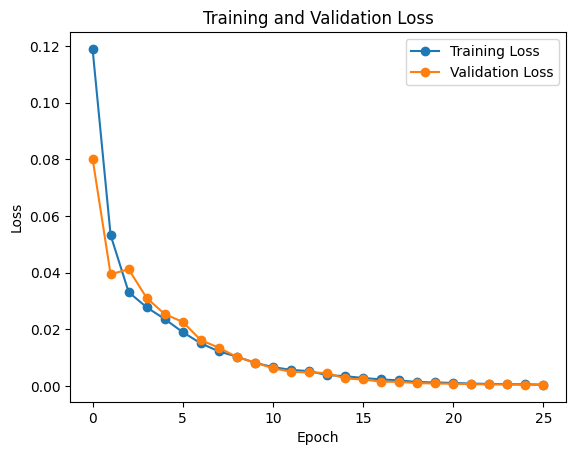

In [5]:
plt.plot(history.history['loss'],  '-o',  label='Training Loss')
plt.plot(history.history['val_loss'], '-o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Plotting training and validation accuracy

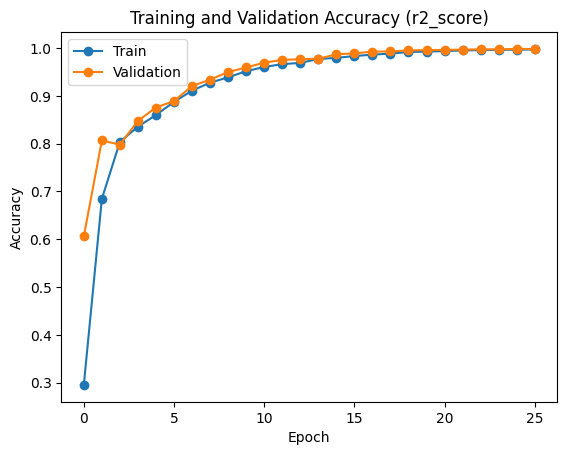

In [6]:
plt.plot(history.history['accuracy'], '-o')
plt.plot(history.history['val_accuracy'], '-o')
plt.title('Training and Validation Accuracy (r2_score)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Evaluatation of the model

In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.3f}%")

1/1 [==============================] - 0s 51ms/step - loss: 6.4695e-04 - accuracy: 0.9960
Test Loss: 0.0006470
Test Accuracy: 99.604%


## Using the test data for prediction and display the prediction accuracy

1/1 [==============================] - 0s 137ms/step
MSE: 0.0006470
R2: 99.60%


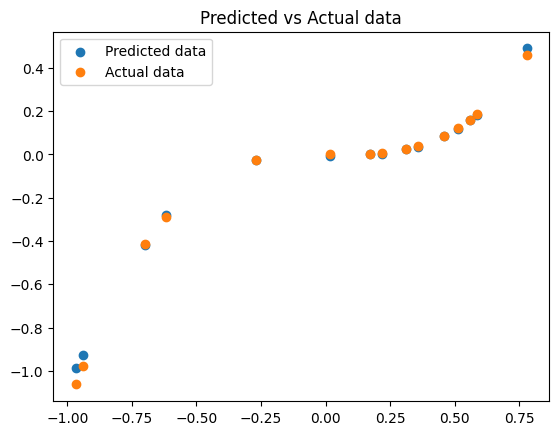

In [8]:
y_pred = model.predict(x_test)

print(f'MSE: {mean_squared_error(y_test, y_pred) :.7f}')
print(f'R2: {r2_score(y_test, y_pred) * 100 :.2f}%')

plt.scatter(x_test, y_pred, label='Predicted data')
plt.scatter(x_test, y_test, label='Actual data')
plt.title('Predicted vs Actual data')
plt.legend()
plt.show()
